In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
import seaborn as sns
import hvplot.pandas

Cleaning 2022 State Population


In [ ]:
usstates = pd.read_csv('../data/NST-EST2022-POPCHG2020_2022.csv')
state_pop = pd.DataFrame(usstates)
state_pop.head()

In [ ]:
filtered_usstate_df = state_pop[['NAME', 'POPESTIMATE2022']]
state_pop = pd.DataFrame(filtered_usstate_df)
state_pop_df = state_pop.rename(columns={'NAME': "State", "POPESTIMATE2022": "2022 Population Estimate"})
state_pop_df.head()

In [ ]:
#
def assign_region(state):
    # Replace these conditions with your criteria
    if state in ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York','New York City', 'New Jersey', 'Pennsylvania']:
        return 'Northeast'
    elif state in ['Ohio', 'Michigan', 'Indiana', 'Illinois', 'Wisconsin', 'Minnesota', 'Iowa', 'Missouri']:
        return 'Midwest'
    elif state in ['Delaware', 'Maryland', 'Virginia', 'West Virginia', 'Kentucky', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Tennessee', 'Mississippi', 'Louisiana', 'Arkansas', 'Texas', 'Oklahoma', 'Kansas', 'South Dakota', 'North Dakota', 'Nebraska']:
        return 'South'
    elif state in ['Montana', 'Idaho', 'Wyoming', 'Colorado', 'New Mexico', 'Arizona', 'Utah', 'Nevada', 'California', 'Oregon', 'Washington', 'Alaska', 'Hawaii']:
        return 'West'
    else:
        return 'Unknown'
state_pop_df['Region'] = state_pop_df['State'].apply(assign_region)

region_dfs = {region: group for region, group in state_pop_df.groupby('Region')}

northeast_df = region_dfs.get('Northeast')
midwest_df = region_dfs.get('Midwest')
south_df = region_dfs.get('South')
west_df = region_dfs.get('West')
unknown_df = region_dfs.get('Unknown')

regions_df = pd.concat([northeast_df, midwest_df, south_df, west_df], ignore_index=True)

regions_df.to_csv('../data/CLEAN_regionpopulation.csv', index=False)

Analysis

In [3]:
medium_state = pd.read_csv('../data/medium_state_rows.csv')
medium_state_df = pd.DataFrame(medium_state)
#medium_state_df.columns

Index(['State', '2022 Population Estimate', 'Region',
       'Total doses distributed', 'Total doses administered by jurisdiction',
       'Residents with at least one dose',
       'Percent of total pop with at least one dose',
       'Residents 18+ with a completed primary series',
       'Residents 65+ with at least one dose',
       'Residents 65+ with a completed primary series',
       'Residents 12+ with at least one dose',
       'Residents 12+ with a completed primary series',
       'Residents 5+ with at least one dose',
       'Residents 5+ with a completed primary series', 'Data As Of',
       'Start Date', 'End Date', 'Sex', 'Age Group', 'COVID-19 Deaths',
       'Total Deaths', 'Pneumonia and COVID-19 Deaths'],
      dtype='object')

In [4]:
medium_state_df.set_index('State', inplace=True)
#medium_state_df.head()

,2022 Population Estimate,Region,Total doses distributed,Total doses administered by jurisdiction,Residents with at least one dose,Percent of total pop with at least one dose,Residents 18+ with a completed primary series,Residents 65+ with at least one dose,Residents 65+ with a completed primary series,Residents 12+ with at least one dose,...,Residents 5+ with at least one dose,Residents 5+ with a completed primary series,Data As Of,Start Date,End Date,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia and COVID-19 Deaths
State,,,,,,,,,,,,,,,,,,,,,
Connecticut,3626205,Northeast,11881825,9040989,3670090,95.0,2602449,823664,654355,3481915,...,3640198,2948721,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,12571.0,130502.0,4082.0
Indiana,6833037,Midwest,18989660,11201087,4350210,64.6,3511518,1046568,976073,4152915,...,4321434,3886503,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,26885.0,282262.0,13954.0
Iowa,3200517,Midwest,9429185,6131087,2235485,70.9,1818244,564406,532779,2126967,...,2215662,2024863,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,11026.0,125759.0,4065.0
Minnesota,5717184,Midwest,18519240,12829141,4461994,79.1,3533102,975356,919278,4143519,...,4390824,4039371,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,15298.0,188637.0,5610.0
Missouri,6177957,Midwest,15654225,10509024,4269469,69.6,3276112,1058140,943084,4082773,...,4236460,3615520,09/27/2023,01/01/2020,09/23/2023,All Sexes,All Ages,23363.0,273827.0,11052.0


array([<Axes: ylabel='Connecticut'>], dtype=object)

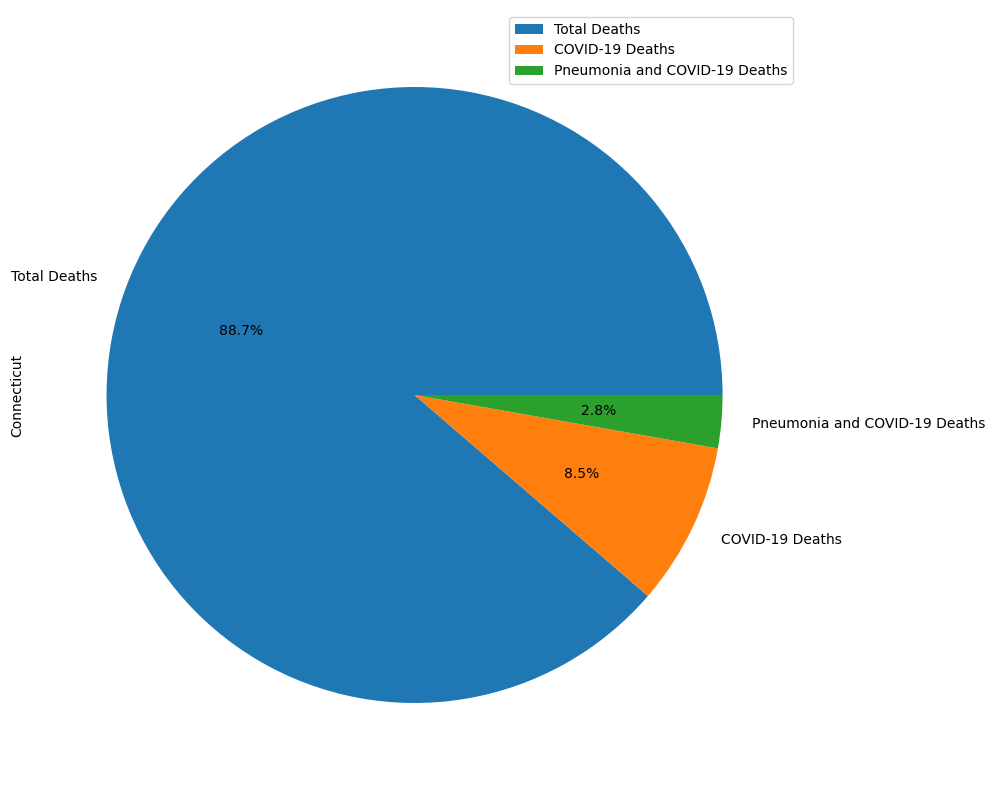

In [13]:
medium_pie_df = medium_state_df[['Total Deaths', 'COVID-19 Deaths', "Pneumonia and COVID-19 Deaths"]]
filteredrow_df = medium_pie_df.iloc[0]
filteredrow_df
filteredrow_df.T.plot.pie(subplots=True, figsize=(20,10), autopct='%1.1f%%', legend=True)


In [6]:
smallstate = pd.read_csv('../data/small_state_rows.csv')
smallstate_df = pd.DataFrame(smallstate)

array([<Axes: ylabel='Maine'>], dtype=object)

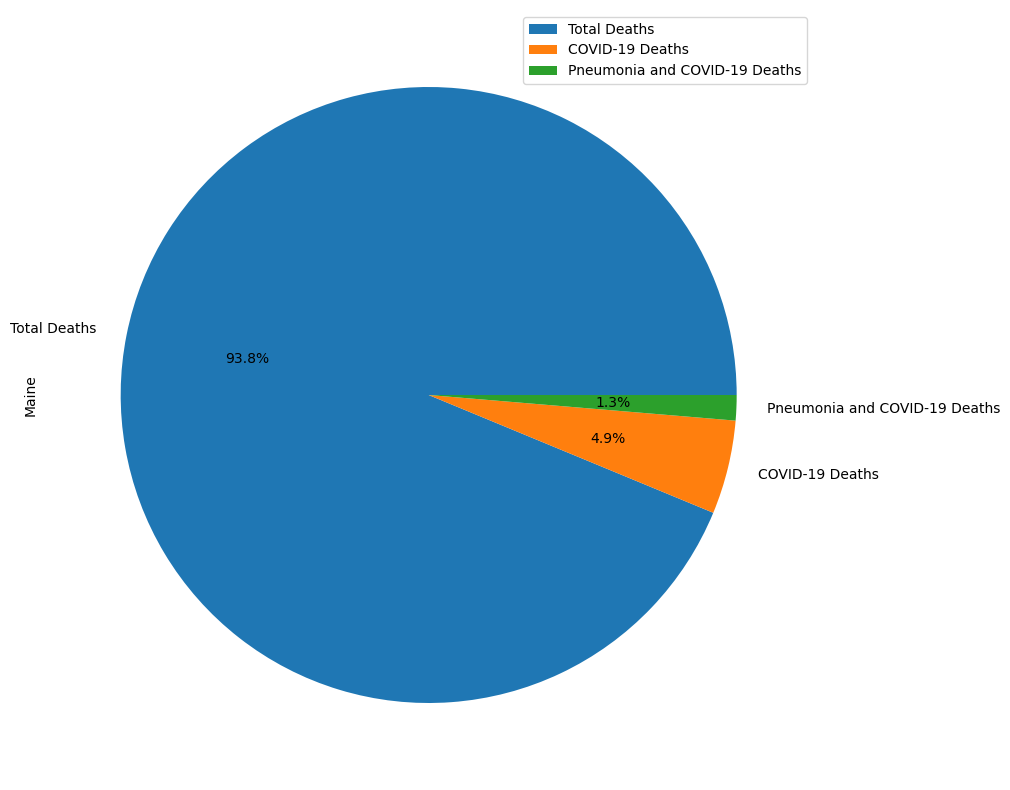

In [7]:
smallstate_df.set_index('State', inplace=True)
smallstate_pie_df = smallstate_df[['Total Deaths', 'COVID-19 Deaths', "Pneumonia and COVID-19 Deaths"]]
smallfilteredrow_df = smallstate_pie_df.iloc[0]
smallfilteredrow_df.T.plot.pie(subplots=True, figsize=(20,10), autopct='%1.1f%%',legend=True)

array([<Axes: ylabel='Connecticut'>], dtype=object)

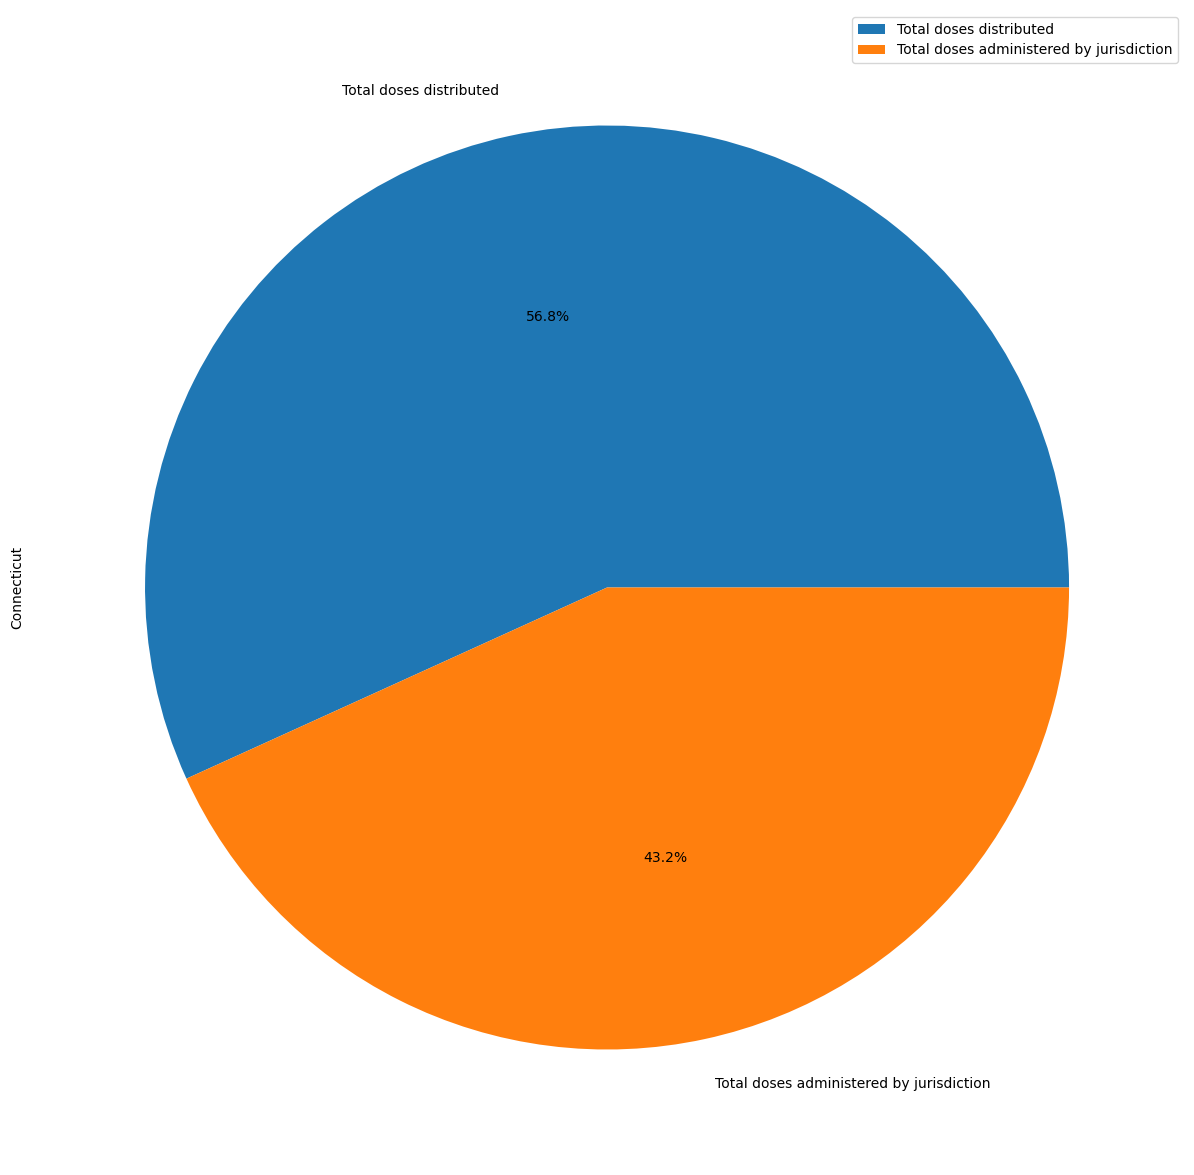

In [8]:
medium_state_df.head()
medium_pie3 = medium_state_df[['Total doses distributed', 'Total doses administered by jurisdiction']]
mediumpie3filteredrow_df = medium_pie3.iloc[0:1]
mediumpie3filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%', legend=True)

array([<Axes: ylabel='Connecticut'>], dtype=object)

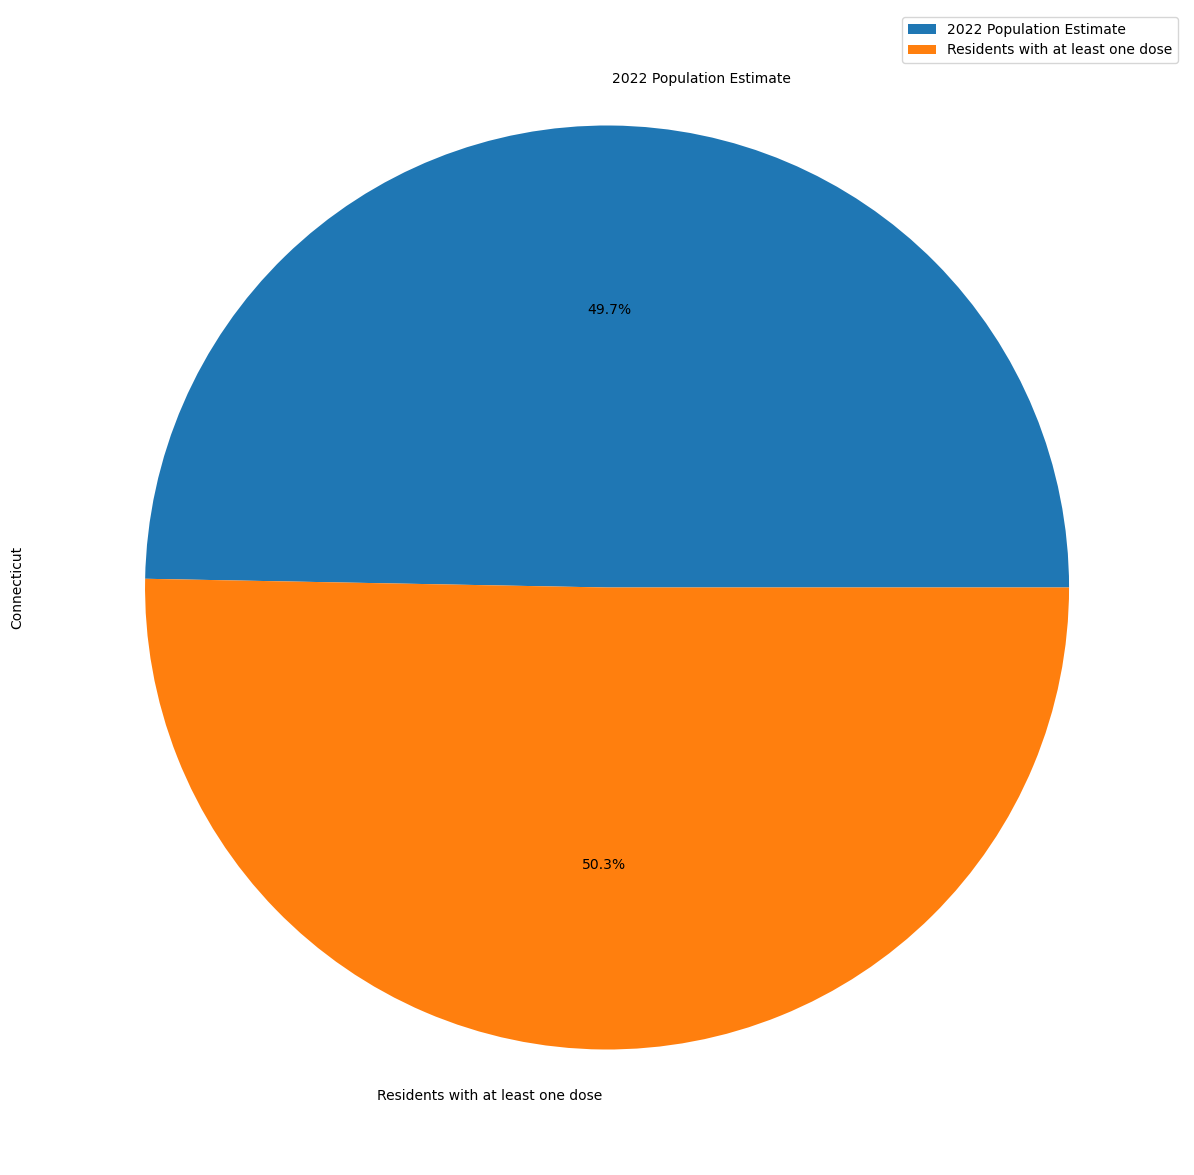

In [9]:
medium_pie4 = medium_state_df[['2022 Population Estimate', 'Residents with at least one dose']]
mediumpie4filteredrow_df = medium_pie4.iloc[0:1]
mediumpie4filteredrow_df.T.plot.pie(subplots=True, figsize=(30,15), autopct='%1.1f%%', legend=True)